# Prompt

### Assume we have two continuous data streams :
- Stream A
    - schema : { unique_identifier, number, text }
    - velocity : 100k records per day
    - cardinality : bounded at around 3M ( so, in 30 days we update all records )
- Stream B
    - schema : { unique_identifier, Stream_A_unique_identifier, number, text }
        - these are essentially child objects of Stream A
    - velocity : 1M records per day
    - cardinality : unbounded ~ although, of the 1M / day, 80% are overlapping
    
### Requirements
- support realtime, or near-realtime event notifications ( looking for some signal in the text )
- support rolling aggregates over a period of time
    - number of Schema B items in the past N hours
    - number of Schema B w/ condition in past N hours
- support lookup of Stream A assets by by identifier
- support lookup of Stream B assets by Stream_A identifiers
- support analytics projects for Stream A/B ( ie : custom analytics for "data-science" explorations that don't bring down the system )

## Initial Def

### Functional Components
- Ingestion Component - ingests data streams from external sources
- Real-Time Processing Component - signal event notifications
- Storage Component - document storage due to semi-struc nature of data
- Async Analytics Component - queryable interface to suport lookup/aggregations/analytics

In [5]:
from diagrams import Cluster, Diagram
from diagrams.aws.analytics import KinesisDataAnalytics, KinesisDataStreams, KinesisDataFirehose
from diagrams.aws.database import Dynamodb
from diagrams.aws.compute import LambdaFunction
from diagrams.generic.compute import Rack

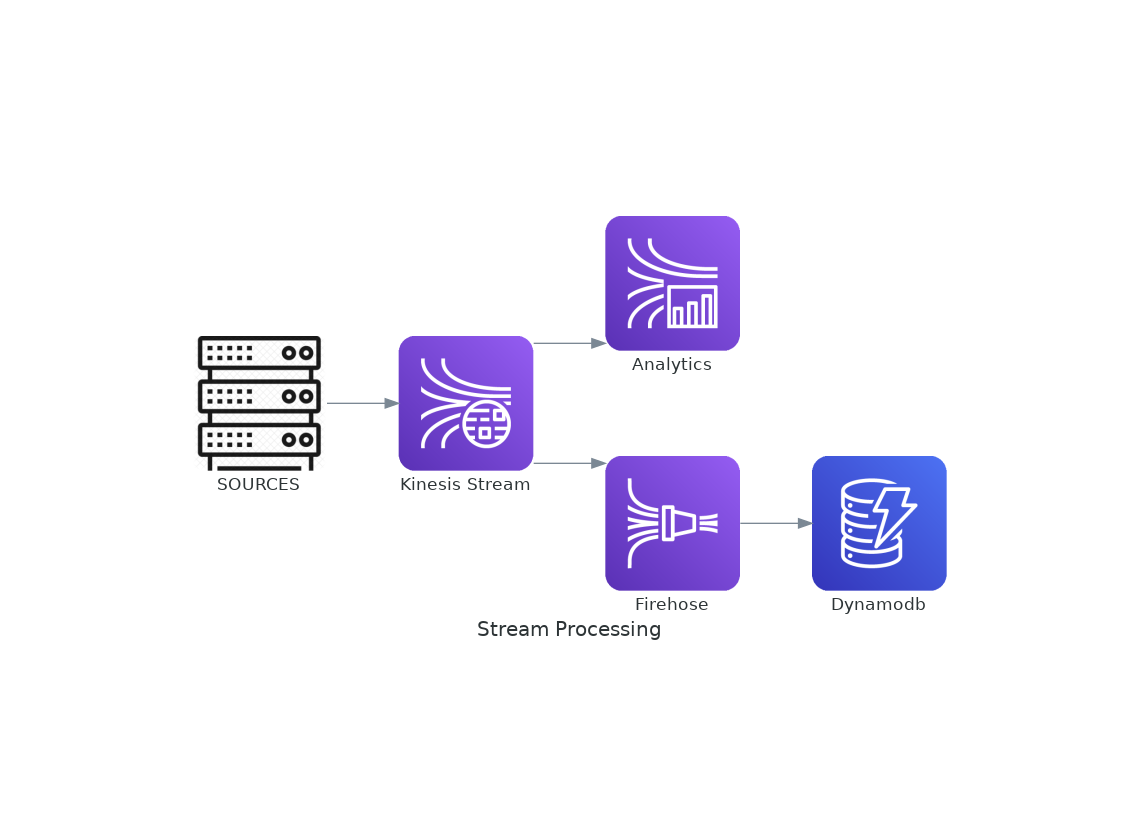

In [15]:
with Diagram("Stream Processing", show=False) as diag:
    source = Rack("SOURCES")
    stream = KinesisDataStreams("Kinesis Stream")
    rtp = KinesisDataAnalytics("Analytics")
    firehose = KinesisDataFirehose("Firehose")
    store = Dynamodb("Dynamodb")
    
    
    
    source >> stream
    stream >> rtp
    stream >> firehose >> store
    
diag